In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn import metrics
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('./월별 기술데이터.xlsx')

In [3]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')
    
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# 회사별로 reshape  20
def reshape_fin_dataset(data):
    ##  쓸데없는 칼럼 제거
    company_name = list((data.iloc[8]))
    col_name = list(data.iloc[11])
    data = data.iloc[13:]
    data.columns = col_name
    col_num = len(list(set(col_name)))
    dummy = pd.DataFrame([np.nan])
    # 더미 데이터셋 생성
    sets = pd.DataFrame()    
    for i in range(len(set(company_name))):
        ## 회사 별로 뽑아오기
        sub_dataset = data.iloc[:,i*col_num : (i+1)*col_num][:-1]
        sub_dataset['Name'] = company_name[i*col_num]
        sub_revenue = sub_dataset['수익률 (1개월)(%)'][1:]
        sub_revenue = sub_revenue.append(dummy)
        sub_revenue.index = sub_dataset.index
        sub_dataset['수익률 (1개월)(%)'] = sub_revenue
        sets = sets.append(sub_dataset)
    
    sets2 = sets[['거래정지구분','수익률 (1개월)(%)', '변동성 (5일)', '변동성 (20일)', '수정주가 (5일 최고)(원)',
       '수정주가 (5일 평균)(원)', '수정주가 (20일 최고)(원)','수정주가 (5일 최저)(원)', '수정주가 (20일 최저)(원)',
       '수정주가 (20일 평균)(원)', '거래량 (5일 평균)(주)', '거래량 (20일 평균)(주)', '거래량 (60일 평균)(주)',
       '거래량 (120일 평균)(주)', '외국인보유비중(티커)(%)', '공매도거래량 (5일)(주)', '공매도거래량 (20일)(주)', 
       '공매도거래량 (60일)(주)',       '순매수수량(기관계)(주)', '순매수수량(기관계)(5일합산)(주)', '순매수수량(기관계)(20일합산)(주)',
       '순매수수량(개인)(주)', '순매수수량(개인)(5일합산)(주)', '순매수수량(개인)(20일합산)(주)',
       '순매수수량(외국인계)(주)', '순매수수량(외국인계)(5일합산)(주)', '순매수수량(외국인계)(20일합산)(주)',
       'PBR(IFRS-연결)', 'PSR(IFRS-연결)', 'Name']]
    sets2['수익률 (1개월)(%)'] = sets2['수익률 (1개월)(%)'].astype('float64')
    return sets2

In [5]:
# 2013년 9월 ~ 2018 년 6월 완료
tech = reshape_fin_dataset(data)
tech

,거래정지구분,수익률 (1개월)(%),변동성 (5일),변동성 (20일),수정주가 (5일 최고)(원),수정주가 (5일 평균)(원),수정주가 (20일 최고)(원),수정주가 (5일 최저)(원),수정주가 (20일 최저)(원),수정주가 (20일 평균)(원),...,순매수수량(기관계)(20일합산)(주),순매수수량(개인)(주),순매수수량(개인)(5일합산)(주),순매수수량(개인)(20일합산)(주),순매수수량(외국인계)(주),순매수수량(외국인계)(5일합산)(주),순매수수량(외국인계)(20일합산)(주),PBR(IFRS-연결),PSR(IFRS-연결),Name
2010-01-31,정상,-8.71,0.0239,0.0229,16840,16196,17000,15680,15680,16402,...,-473343,110000,121100,-184356,-88127,-47992,744373,1.71,0.98,삼성전자
2010-02-28,정상,9.95,0.0175,0.0167,15460,15088,15680,14720,14720,15255,...,-82866,-17649,224575,752351,19457,-253284,-712586,1.62,0.93,삼성전자
2010-03-31,정상,4.30,0.0037,0.0126,16400,16356,16400,16280,15220,15898,...,-255572,-44492,-115099,-555656,-22702,76943,873924,1.78,1.02,삼성전자
2010-04-30,정상,-8.60,0.0151,0.0159,16980,16672,17400,16500,16500,16869,...,-250778,-109953,-35891,-202018,113918,132690,507978,1.85,1.06,삼성전자
2010-05-31,정상,-0.51,0.0191,0.0199,15560,15268,16980,14820,14820,15806,...,-277129,2214,70587,719613,19765,-54295,-558249,1.69,0.97,삼성전자
2010-06-30,정상,4.65,0.0162,0.016,16400,15948,16600,15480,15400,15983,...,-424483,129917,207386,-38573,-66633,-80831,436295,1.69,0.97,삼성전자
2010-07-31,정상,-6.67,0.0151,0.0152,16740,16484,16740,16200,15340,16076,...,-387193,33060,-280740,-675398,7803,313684,1106597,1.77,1.01,삼성전자
2010-08-31,정상,0.13,0.0148,0.0115,15520,15372,16120,15120,15120,15663,...,-733650,165428,259665,813608,-98638,-60509,-24550,1.65,0.94,삼성전자
2010-09-30,정상,-3.50,0.0231,0.0169,15540,15244,15760,14900,14900,15297,...,-571493,-104026,116567,608617,129176,159153,-30638,1.7,0.97,삼성전자
2010-10-31,정상,10.87,0.0144,0.0152,15420,15184,15860,14900,14820,15196,...,-386323,182502,204075,446953,-83635,188845,36009,1.63,0.93,삼성전자


In [6]:
tech.columns

Index(['거래정지구분', '수익률 (1개월)(%)', '변동성 (5일)', '변동성 (20일)', '수정주가 (5일 최고)(원)',
       '수정주가 (5일 평균)(원)', '수정주가 (20일 최고)(원)', '수정주가 (5일 최저)(원)',
       '수정주가 (20일 최저)(원)', '수정주가 (20일 평균)(원)', '거래량 (5일 평균)(주)',
       '거래량 (20일 평균)(주)', '거래량 (60일 평균)(주)', '거래량 (120일 평균)(주)',
       '외국인보유비중(티커)(%)', '공매도거래량 (5일)(주)', '공매도거래량 (20일)(주)',
       '공매도거래량 (60일)(주)', '순매수수량(기관계)(주)', '순매수수량(기관계)(5일합산)(주)',
       '순매수수량(기관계)(20일합산)(주)', '순매수수량(개인)(주)', '순매수수량(개인)(5일합산)(주)',
       '순매수수량(개인)(20일합산)(주)', '순매수수량(외국인계)(주)', '순매수수량(외국인계)(5일합산)(주)',
       '순매수수량(외국인계)(20일합산)(주)', 'PBR(IFRS-연결)', 'PSR(IFRS-연결)', 'Name'],
      dtype='object')

In [7]:
tech['거래정지구분'].isna().sum()

755

In [17]:
for i in tech.columns:
    print( '{} : {}'.format(i,tech[i].isna().sum()))

거래정지구분 : 755
수익률 (1개월)(%) : 905
변동성 (5일) : 758
변동성 (20일) : 773
수정주가 (5일 최고)(원) : 755
수정주가 (5일 평균)(원) : 755
수정주가 (20일 최고)(원) : 755
수정주가 (5일 최저)(원) : 755
수정주가 (20일 최저)(원) : 755
수정주가 (20일 평균)(원) : 755
거래량 (5일 평균)(주) : 755
거래량 (20일 평균)(주) : 755
거래량 (60일 평균)(주) : 755
거래량 (120일 평균)(주) : 755
외국인보유비중(티커)(%) : 755
공매도거래량 (5일)(주) : 755
공매도거래량 (20일)(주) : 755
공매도거래량 (60일)(주) : 755
순매수수량(기관계)(주) : 755
순매수수량(기관계)(5일합산)(주) : 755
순매수수량(기관계)(20일합산)(주) : 755
순매수수량(개인)(주) : 755
순매수수량(개인)(5일합산)(주) : 755
순매수수량(개인)(20일합산)(주) : 755
순매수수량(외국인계)(주) : 755
순매수수량(외국인계)(5일합산)(주) : 755
순매수수량(외국인계)(20일합산)(주) : 755
PBR(IFRS-연결) : 841
PSR(IFRS-연결) : 805
Name : 0


In [8]:
tech.to_excel('./tech.xlsx',encoding='utf-8')

In [18]:
def making_rate_of_change(sub_dataset,col):
    # 변화율 칼럼 삽입 / 기존 칼럼 삭제*********************************************************************
    for colname in col:
        # 변화율 백터 생성
        a = sub_dataset[colname]
        g = list(a.pct_change())

        ## 분보가 - 일때 방향성이 달라져서 -1 곱하기
        for i in list(range(len(a)))[:-1]:
            if list(a)[i] < 0:
                g[i+1] = g[i+1] * (-1)
                
            elif list(a)[i] == 0:
                g[i+1] = np.nan
                    
        sub_dataset[colname+'변화율'] = g
        
    return sub_dataset

In [19]:
def scaling_data(sub_set):
    scaled_data = pd.DataFrame()

    sub_set = sub_set.iloc[1:]
    sub_set_y = sub_set.index    
    
    scale_col = ['외국인보유비중(티커)(%)', '공매도거래량 (5일)(주)', '공매도거래량 (20일)(주)',
       '공매도거래량 (60일)(주)', '순매수수량(기관계)(주)', '순매수수량(기관계)(5일합산)(주)',
       '순매수수량(기관계)(20일합산)(주)', '순매수수량(개인)(주)', '순매수수량(개인)(5일합산)(주)',
       '순매수수량(개인)(20일합산)(주)', '순매수수량(외국인계)(주)', '순매수수량(외국인계)(5일합산)(주)',
       '순매수수량(외국인계)(20일합산)(주)', 'PBR(IFRS-연결)', 'PSR(IFRS-연결)','변동성 (5일)', '변동성 (20일)']
    
    unscale_col = ['Name', '변동성 (5일)변화율', '변동성 (20일)변화율',
       '수정주가 (5일 최고)(원)변화율', '수정주가 (20일 최고)(원)변화율', '외국인보유비중(티커)(%)변화율',
                   '공매도거래량 (20일)(주)변화율', '공매도거래량 (60일)(주)변화율', '순매수수량(기관계)(주)변화율',
                   '순매수수량(기관계)(20일합산)(주)변화율','순매수수량(개인)(주)변화율', '순매수수량(개인)(20일합산)(주)변화율',
                   '순매수수량(외국인계)(주)변화율','순매수수량(외국인계)(20일합산)(주)변화율', 'PBR(IFRS-연결)변화율',
                   'PSR(IFRS-연결)변화율', '수정주가 (5일 최저)(원)변화율','수정주가 (20일 최저)(원)변화율', '수정주가 (5일 최고)(원)',
                   '수정주가 (5일 평균)(원)', '수정주가 (20일 최고)(원)', '수정주가 (5일 최저)(원)', '수정주가 (20일 최저)(원)',
                   '수정주가 (20일 평균)(원)', '거래량 (5일 평균)(주)','수정주가 (20일 평균)(원)','수정주가 (5일 평균)(원)',
                   '거래량 (20일 평균)(주)', '거래량 (60일 평균)(주)', '거래량 (120일 평균)(주)','수익률 (1개월)(%)',
                   '수정주가 (20일 평균)(원)변화율','수정주가 (5일 평균)(원)변화율']
    
    sub_set_x = sub_set[scale_col]
    sub_set_no = sub_set[unscale_col]
    
    ## 스케일 부분
    scaled_sub_set_x = pd.DataFrame(scale(sub_set_x),index = sub_set_y ,columns = scale_col)
    x = pd.concat([scaled_sub_set_x,sub_set_no],axis = 1)
    
    return x

In [20]:
def make_cate_t(data):
    ## 수익률 범주화
    bb = np.array([-100,0,100])

    Y_data_cat = np.digitize(data['수익률 (1개월)(%)'],bb)
    Y_data_cat = Y_data_cat - 1
    
    return Y_data_cat

In [21]:
## 표춘편차 이용
def std_based_outlier(df):
    cols = []
    
    for i in range(0, len(cols)):
        df = df[~(np.abs(df.iloc[:,i] - df.iloc[:,i].mean()) > (3*df.iloc[:,i].std()))]
    
    return(df)

In [22]:
## 증가율로 바꾸기 / null값 지우기 등.. 실행
def preprocessing_data(data):    
    col_name = data.columns
    company_name = data.Name
    scaled_total_dataset = pd.DataFrame()

    for name in list(set(company_name)):
        
        ## 회사 별로 뽑아오기
        sub_dataset = data[data.Name == name]
        
        #거래정지구분에서 null 값있는 row 제거(상장 전 기간 제거)
        select_notNan = sub_dataset['거래정지구분'].dropna()
        sub_dataset = sub_dataset.loc[select_notNan.index]
        
        # 거래정지 로우 & 칼럼 제거
        sub_dataset = sub_dataset[sub_dataset['거래정지구분'] !='거래정지']
        sub_dataset.drop(['거래정지구분'],inplace=True,axis=1)
        
#         #결측치 처리 구간 ***********************************************************************
#         per, psr, pbr => null은 칼럼 평균으로 대체 
#         sub_dataset['PER(IFRS-연결)'].fillna(sub_dataset['PER(IFRS-연결)'].mean(),inplace = True)
#         sub_dataset['PSR(IFRS-연결)'].fillna(sub_dataset['PSR(IFRS-연결)'].mean(),inplace = True)
#         sub_dataset['PBR(IFRS-연결)'].fillna(sub_dataset['PBR(IFRS-연결)'].mean(),inplace = True)
        
        # 변화율로 만들기
        sub_dataset = making_rate_of_change(sub_dataset,
        ['변동성 (5일)', '변동성 (20일)', '수정주가 (5일 최고)(원)', '수정주가 (20일 최고)(원)', '외국인보유비중(티커)(%)',
         '공매도거래량 (20일)(주)', '공매도거래량 (60일)(주)', '순매수수량(기관계)(주)','순매수수량(기관계)(20일합산)(주)',
         '순매수수량(개인)(주)','순매수수량(개인)(20일합산)(주)','순매수수량(외국인계)(주)','순매수수량(외국인계)(20일합산)(주)',
         'PBR(IFRS-연결)', 'PSR(IFRS-연결)',  '수정주가 (5일 최저)(원)', '수정주가 (20일 최저)(원)',
         '수정주가 (20일 평균)(원)','수정주가 (5일 평균)(원)'])

        
        ## 수익률 없는 칼럼 삭제
        sub_dataset = sub_dataset[sub_dataset['수익률 (1개월)(%)'].isna() == False]
        
            # inf 처리
        for i in sub_dataset.columns:
            sub_dataset = sub_dataset.loc[sub_dataset[i] != np.inf]
        
        ### 이상치 처리 ## ************************************************************************************        
        sub_dataset = std_based_outlier(sub_dataset)
        
#        #스케일링
        sub_dataset = scaling_data(sub_dataset)
        
        scaled_total_dataset = scaled_total_dataset.append(sub_dataset)

    
    scaled_total_dataset = scaled_total_dataset[scaled_total_dataset['수익률 (1개월)(%)'] < 50]
    scaled_total_dataset = scaled_total_dataset[scaled_total_dataset['수익률 (1개월)(%)'] > -50 ]

    ### 수익률 변환
    scaled_total_dataset['1개월 수익률(2)'] = make_cate_t(scaled_total_dataset)
    
    # 특정 기업 삭제
    for i in ['동원시스템즈','SBS','SPC삼립']:
        scaled_total_dataset = scaled_total_dataset[scaled_total_dataset.Name != i]

    scaled_total_dataset.dropna(axis=0,inplace=True)
    
    for i in ['외국인보유비중(티커)(%)', '공매도거래량 (5일)(주)', '공매도거래량 (20일)(주)',
       '공매도거래량 (60일)(주)', '순매수수량(기관계)(주)', '순매수수량(기관계)(5일합산)(주)',
       '순매수수량(기관계)(20일합산)(주)', '순매수수량(개인)(주)', '순매수수량(개인)(5일합산)(주)',
       '순매수수량(개인)(20일합산)(주)', '순매수수량(외국인계)(주)', '순매수수량(외국인계)(5일합산)(주)',
       '순매수수량(외국인계)(20일합산)(주)', 'PBR(IFRS-연결)', 'PSR(IFRS-연결)', '변동성 (5일)',
       '변동성 (20일)','변동성 (5일)변화율', '변동성 (20일)변화율',
       '수정주가 (5일 최고)(원)변화율', '수정주가 (20일 최고)(원)변화율', '외국인보유비중(티커)(%)변화율',
       '공매도거래량 (20일)(주)변화율', '공매도거래량 (60일)(주)변화율', '순매수수량(기관계)(주)변화율',
       '순매수수량(기관계)(20일합산)(주)변화율', '순매수수량(개인)(주)변화율', '순매수수량(개인)(20일합산)(주)변화율',
       '순매수수량(외국인계)(주)변화율', '순매수수량(외국인계)(20일합산)(주)변화율', 'PBR(IFRS-연결)변화율',
       'PSR(IFRS-연결)변화율', '수정주가 (5일 최저)(원)변화율', '수정주가 (20일 최저)(원)변화율',
       '수정주가 (5일 최고)(원)', '수정주가 (5일 평균)(원)', '수정주가 (20일 최고)(원)',
       '수정주가 (5일 최저)(원)', '수정주가 (20일 최저)(원)', '수정주가 (20일 평균)(원)',
       '거래량 (5일 평균)(주)', '거래량 (20일 평균)(주)', '거래량 (60일 평균)(주)','수정주가 (20일 평균)(원)',
       '수정주가 (5일 평균)(원)','거래량 (120일 평균)(주)']:
        scaled_total_dataset[i] = scaled_total_dataset[i].astype('float64')
        
    for i in ['변동성 (5일)변화율', '변동성 (20일)변화율',
       '수정주가 (5일 최고)(원)변화율', '수정주가 (20일 최고)(원)변화율', '외국인보유비중(티커)(%)변화율',
       '공매도거래량 (20일)(주)변화율', '공매도거래량 (60일)(주)변화율', '순매수수량(기관계)(주)변화율',
       '순매수수량(기관계)(20일합산)(주)변화율', '순매수수량(개인)(주)변화율', '순매수수량(개인)(20일합산)(주)변화율',
       '순매수수량(외국인계)(주)변화율', '순매수수량(외국인계)(20일합산)(주)변화율', 'PBR(IFRS-연결)변화율',
       'PSR(IFRS-연결)변화율', '수정주가 (5일 최저)(원)변화율', '수정주가 (20일 최저)(원)변화율',
       '수정주가 (20일 평균)(원)변화율','수정주가 (5일 평균)(원)변화율']:
        scaled_total_dataset[i] = scaled_total_dataset[i].apply(lambda x : x > 0 ).astype('int')
        


    return scaled_total_dataset

In [14]:
dataset = preprocessing_data(tech)

In [15]:
dataset.columns

Index(['외국인보유비중(티커)(%)', '공매도거래량 (5일)(주)', '공매도거래량 (20일)(주)',
       '공매도거래량 (60일)(주)', '순매수수량(기관계)(주)', '순매수수량(기관계)(5일합산)(주)',
       '순매수수량(기관계)(20일합산)(주)', '순매수수량(개인)(주)', '순매수수량(개인)(5일합산)(주)',
       '순매수수량(개인)(20일합산)(주)', '순매수수량(외국인계)(주)', '순매수수량(외국인계)(5일합산)(주)',
       '순매수수량(외국인계)(20일합산)(주)', 'PBR(IFRS-연결)', 'PSR(IFRS-연결)', '변동성 (5일)',
       '변동성 (20일)', 'Name', '변동성 (5일)변화율', '변동성 (20일)변화율',
       '수정주가 (5일 최고)(원)변화율', '수정주가 (20일 최고)(원)변화율', '외국인보유비중(티커)(%)변화율',
       '공매도거래량 (20일)(주)변화율', '공매도거래량 (60일)(주)변화율', '순매수수량(기관계)(주)변화율',
       '순매수수량(기관계)(20일합산)(주)변화율', '순매수수량(개인)(주)변화율', '순매수수량(개인)(20일합산)(주)변화율',
       '순매수수량(외국인계)(주)변화율', '순매수수량(외국인계)(20일합산)(주)변화율', 'PBR(IFRS-연결)변화율',
       'PSR(IFRS-연결)변화율', '수정주가 (5일 최저)(원)변화율', '수정주가 (20일 최저)(원)변화율',
       '수정주가 (5일 최고)(원)', '수정주가 (5일 평균)(원)', '수정주가 (20일 최고)(원)',
       '수정주가 (5일 최저)(원)', '수정주가 (20일 최저)(원)', '수정주가 (20일 평균)(원)',
       '거래량 (5일 평균)(주)', '수정주가 (20일 평균)(원)', '수정주가 (5일 평균)(원)',
       '거래량 (20일 평균)(주)', '거래량 (

In [16]:
da = dataset

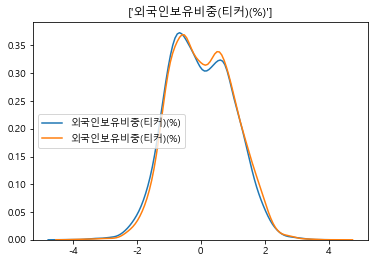

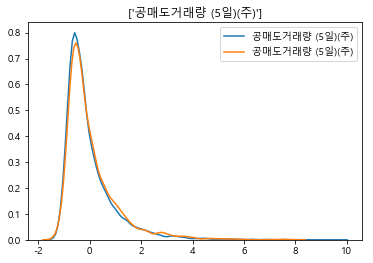

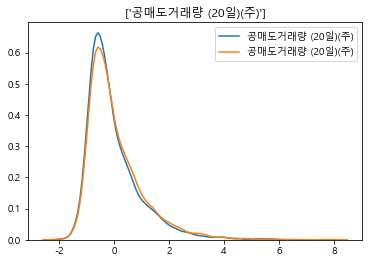

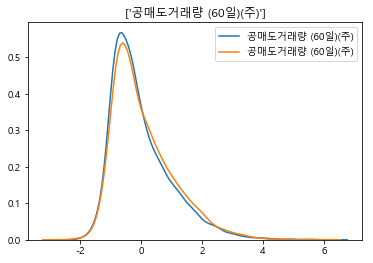

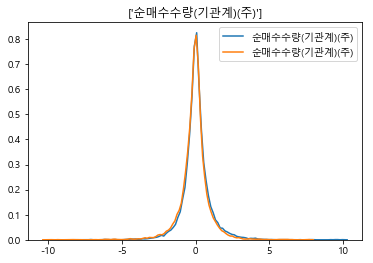

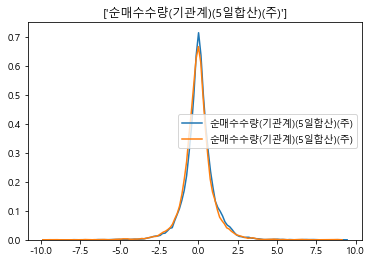

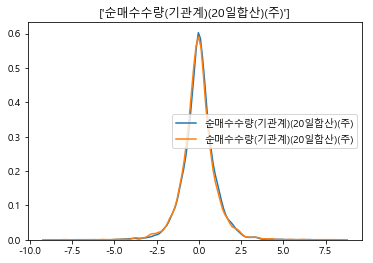

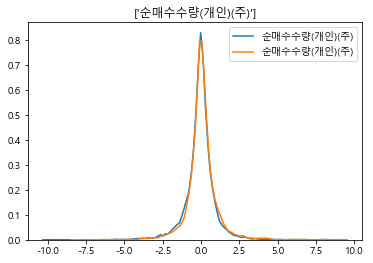

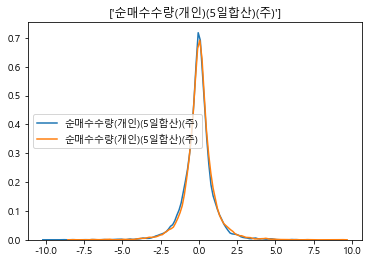

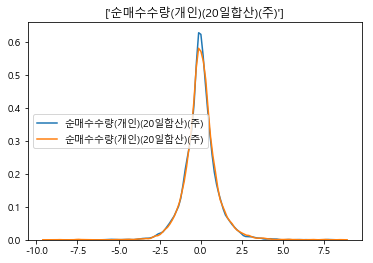

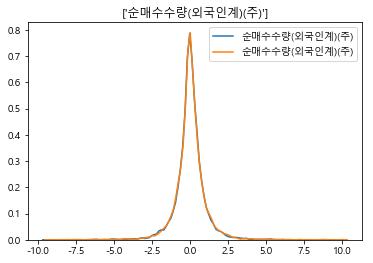

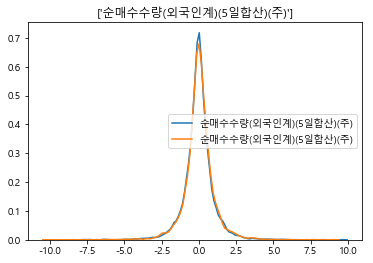

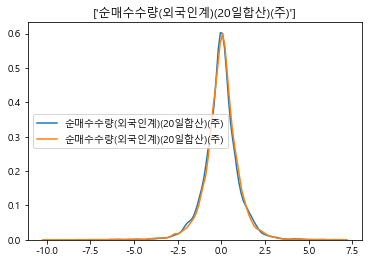

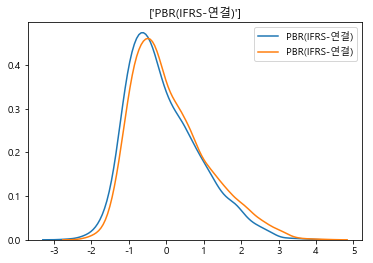

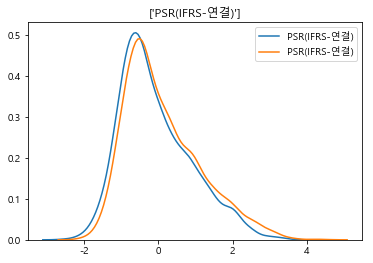

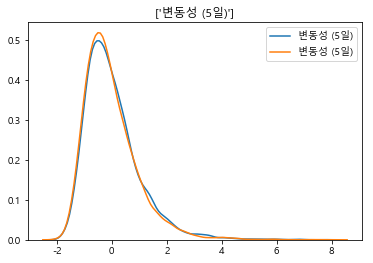

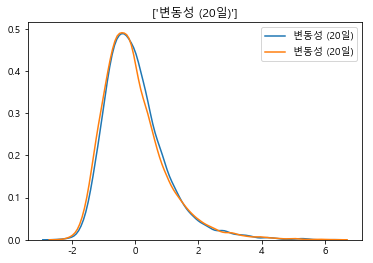

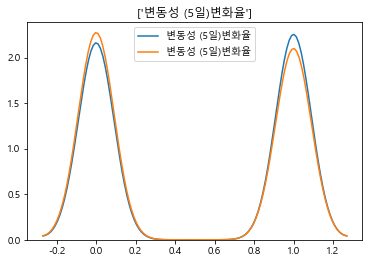

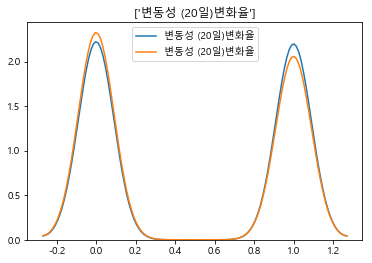

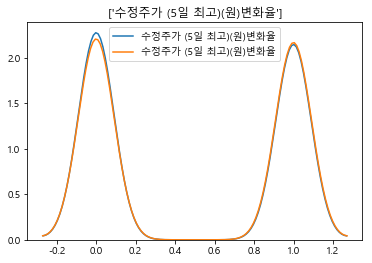

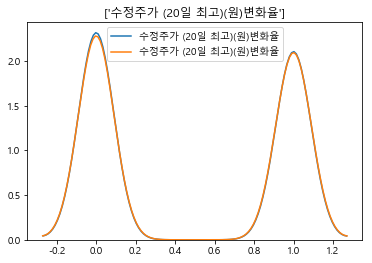

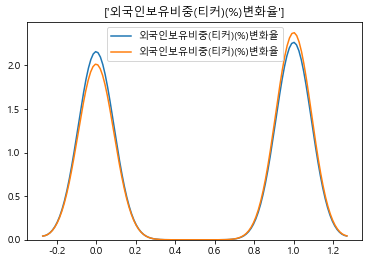

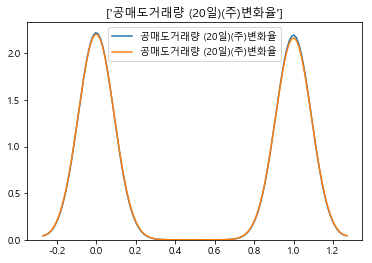

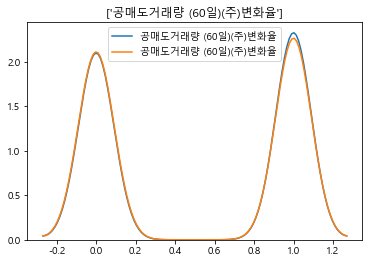

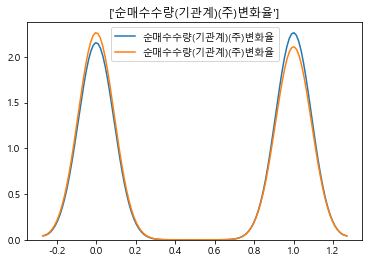

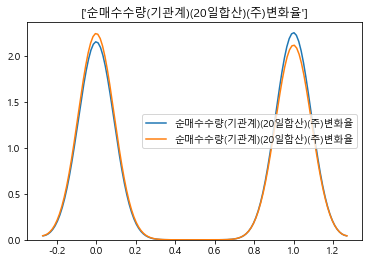

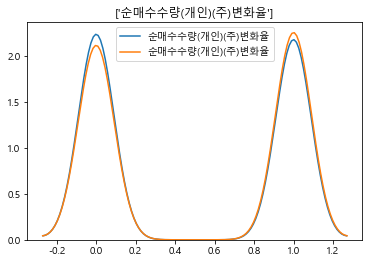

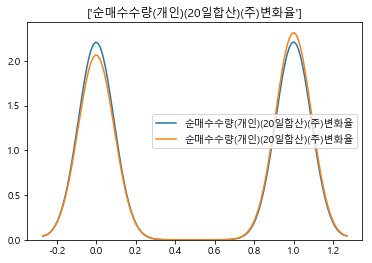

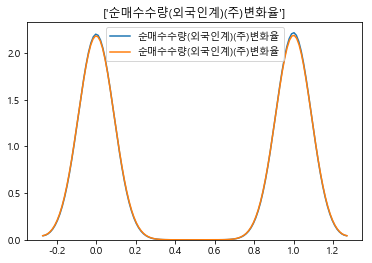

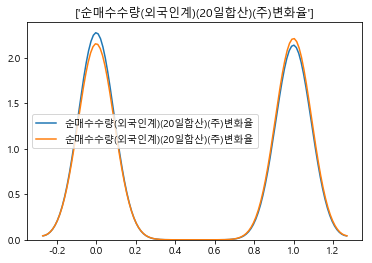

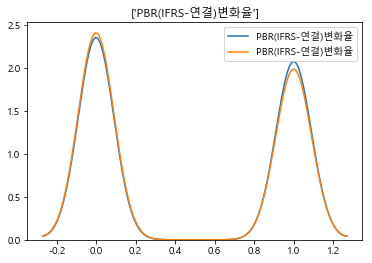

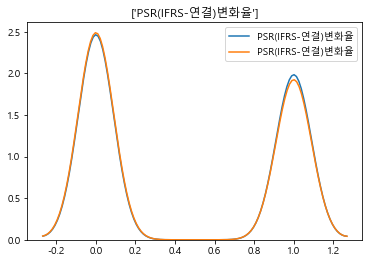

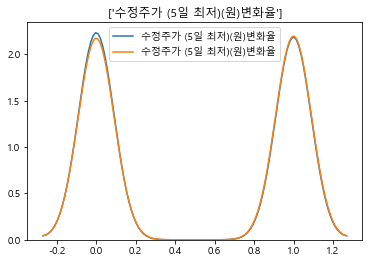

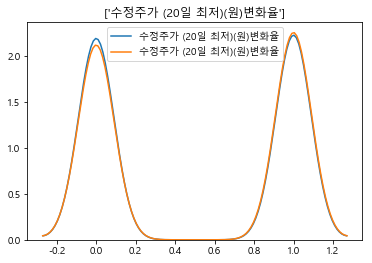

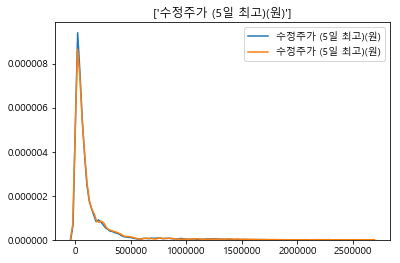

KeyboardInterrupt: 

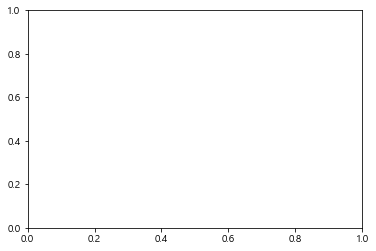

In [21]:
for i in col:
        sns.kdeplot(data=da[da['1개월 수익률(2)'] == 1][i])
        sns.kdeplot(data=da[da['1개월 수익률(2)'] == 0][i])
        plt.title([i])
        plt.show()     

In [ ]:
dataset.to_excel('./non_out_data.xlsx',encoding='utf-8')

In [ ]:
dataset.columns

In [22]:
cols = ['변동성 (20일)', '거래량 (20일 평균)(주)', '외국인보유비중(티커)(%)', '순매수수량(개인)(20일합산)(주)',
        'PBR(IFRS-연결)', 'PSR(IFRS-연결)']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset[cols] , dataset['1개월 수익률(2)'] )



<Figure size 2880x2160 with 0 Axes>

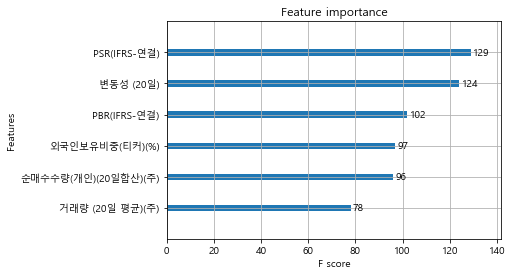

0.539331366764995


In [28]:
from numpy import loadtxt
from xgboost import  XGBClassifier
from xgboost import plot_importance
import xgboost
model = XGBClassifier()
model.fit(X_train,Y_train)
plt.figure(figsize=(40,30))
plot_importance(model)
plt.show()
pre = model.predict(X_test)
tt = metrics.confusion_matrix(Y_test,pre)
print(tt[1,1]/tt[:,1].sum())